Name:  **Sakshi Kakde**  
UID:  **117472448**

# Homework 8:  ADMM

In [1]:
from utility import *
import numpy as np
from numpy import sqrt, sum, abs, sign, max, maximum, minimum, logspace, exp, log, log10, zeros
from numpy.linalg import norm
from numpy.random import randn, rand, normal, randint
import urllib
import matplotlib.pyplot as plt
import io
np.random.seed(0)
def good_job(path):
    f = urllib.request.urlopen(path)
    a = plt.imread(io.BytesIO(f.read()))
    fig = plt.imshow(a)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
np.random.seed(0)

In this problem,
you'll write an "unwrapped ADMM" solver for the support-vector machine problem
$$
 \min \quad \frac{1}{2} \|x\|^2+Ch(Ax)
$$ 
where $h(z) = \sum_i \max\{1-z_i,0\}$ is the hinge loss function, and  $A = YX$ is the product of the (diagonal) label matrix with the data matrix.  Your solver will be based on the constrained formulation

$$
\begin{align}
 \min &\quad \frac{1}{2} \|x\|^2+Ch(y)\\
 \text{subject to}&\quad   y-Ax=0.
\end{align}
$$
Start by running the block below to produce a test problem.

In [2]:
# Define a classification problem
X, y = create_classification_problem(100, 10, cond_number=10)
A = y*X
t = 1/norm(A.T@A)
C = 1

### Write the scaled augmented Lagrangian for the constrained problem
 Use $\lambda$ to donote the Lagrange multiplier.
 
 **Your solution here**
 $$
 L(x, y, \lambda) = \min \frac{1}{2} \|x\|^2 + Ch(y) + \frac{\tau}{2} \|y - Ax + \frac{\lambda}{\tau}\|^2
 $$

### Write the system of equations that needs to be solved to update $x$
 **Your solution here**      
$ \lambda' = \frac{\lambda}{\tau}$     

$ x - \tau A^T (y - Ax + \lambda') = 0$     

$ (I + \tau A^T A)x = \tau A.T (y + \lambda)$

###  Write a routine to evaluate the prox operator of the hinge loss. Your routine will return the solution to the prox problem
$$\text{prox}_h(z,t) = \arg\min_x h(x) + \frac{1}{2t}\|x-z\|^2.$$
You cannot use an iterative method to compute this value.  Note: this can be done with one line of code.  The prox operator for the hinge loss is a lot like the prox operator for L1.

In [3]:
def hprox(z,t):
    # Your work here
    x = z + maximum(minimum(1-z,t),0)
    return x

### Now run these unit tests

In [4]:
assert hprox(0,1)==1, "Your prox operator failed unit test 1"
assert hprox(1,1)==1, "Your prox operator failed unit test 2"
assert hprox(-1,1)==0, "Your prox operator failed unit test 3"
assert hprox(1,2)==1, "Your prox operator failed unit test 4"
assert hprox(1,3)==1, "Your prox operator failed unit test 5"
assert hprox(4,3)==4, "Your prox operator failed unit test 6"

### Write an ADMM loop to solve the SVM problem above.  
Use your prox operator for the $y$ update.
Run the solver until the primal and dual residuals satisfy
$$p^k \le 10^{-5} \max_{i<k}p^i$$
$$d^k \le 10^{-5} \max_{i<k}d^i.$$
The residuals are given by 
$$p^k = \|Ax^k-y^k\|$$
$$d^k = \|\tau A^T(y^k-y^{k-1})\|.$$

In [5]:
x = zeros((10,1))
y = zeros((100,1))
l = zeros((100,1))

# Your work below
iterations = 1000
one = np.eye(A.T.shape[0])
p = np.zeros([iterations, 1])
d = np.zeros([iterations, 1])

for k in range(iterations):
    y_old = y
    #x_k+1
    x = np.linalg.inv((one + t * A.T @ A)) @ (t * A.T @ (y+l))
    #y_k+1
    y = hprox(A @ x - l, C/t)
    #lmabda_k+1
    l = l + y - A @ x
 
    p[k, 0] = norm(A @ x - y)
    d[k, 0] = norm(t * A.T @ (y - y_old))
    if (p[k, 0] < 1e-5 * max(p)) and (d[k, 0] < 1e-5 * max(d)):
        break


### Now run this unit test

Congrats! Your solver works!!


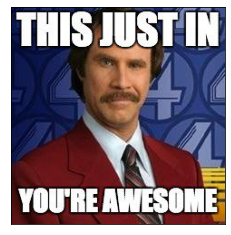

In [6]:
# There are two different optimality conditions that could be satisfied depending on how you formulate the lagrangian
error1 = norm(x+t*A.T@(A@x-y-l))
error2 = norm(x+t*A.T@(A@x-y+l))
assert min(error1/norm(x), error2/norm(x))<1e-3, 'Your ADMM solver did not produce an accurate solution.'
z1 = A@x-l
z2 = A@x+l
error1 = norm(y-z1 - maximum(minimum(1-z1,C/t),0))
error2 = norm(y-z2 - maximum(minimum(1-z2,C/t),0))
assert min(error1/norm(y),error2/norm(y)) <1e-3, 'Your ADMM solver did not produce an accurate solution.'
print('Congrats! Your solver works!!')
good_job("https://www.cs.umd.edu/~tomg/img/important_memes/ron_awesome.png")